In [19]:
# import sys
# import os
# import dlib
# import glob
# from skimage import io

In [20]:
# predictor_path = "shape_predictor_68_face_landmarks.dat/data"
# faces_folder_path = "./Eye_chimeraToPublish/Centre"

In [21]:
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor(predictor_path)
# win = dlib.image_window()

# for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
#     print("Processing file: {}".format(f))
#     img = io.imread(f)

#     win.clear_overlay()
#     win.set_image(img)

#     # Ask the detector to find the bounding boxes of each face. The 1 in the
#     # second argument indicates that we should upsample the image 1 time. This
#     # will make everything bigger and allow us to detect more faces.
#     dets = detector(img, 1)
#     print("Number of faces detected: {}".format(len(dets)))
#     for k, d in enumerate(dets):
#         print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
#             k, d.left(), d.top(), d.right(), d.bottom()))
#         # Get the landmarks/parts for the face in box d.
#         shape = predictor(img, d)
#         print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
#                                                   shape.part(1)))
#         # Draw the face landmarks on the screen.
#         win.add_overlay(shape)

#     win.add_overlay(dets)
# dlib.hit_enter_to_continue()

AttributeError: module 'dlib' has no attribute 'image_window'

In [20]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline
import os
import glob
from copy import deepcopy
import scipy.io as sio 

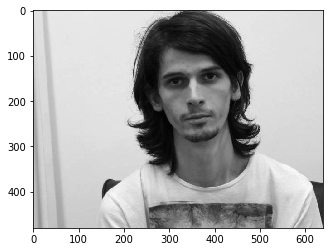

In [2]:
# Define the face and eye classifier
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')
img = mpimg.imread('./data/Eye_chimeraToPublish/0/eyes003019.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
gray = gray.reshape((480,640,1))

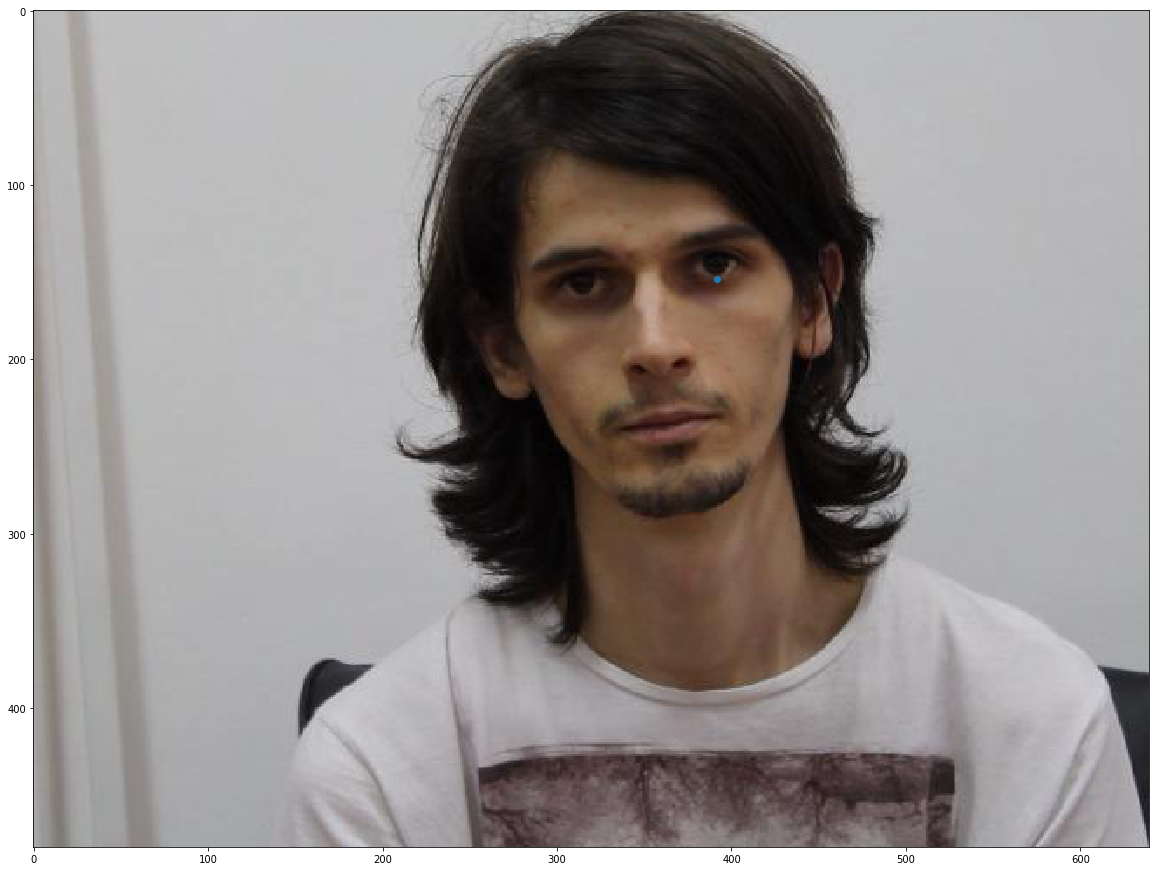

In [54]:

img_path = './data/Eye_chimeraToPublish/0/eyes003019.jpg'
mat_path = './data/Eye_chimeraToPublish/00.Centre/eyes003019.mat'
t_img = mpimg.imread(img_path)
t_mat = sio.loadmat(mat_path)['eyePoints']
fig = plt.figure(figsize = (20,20))
plt.imshow(t_img)
n = 13
plt.plot(t_mat[n,0], t_mat[n,1], 'o')
# print(t_mat)

In [33]:
t_mat[0][0]

303

[[121  53  49  49]
 [ 48  66  47  47]]


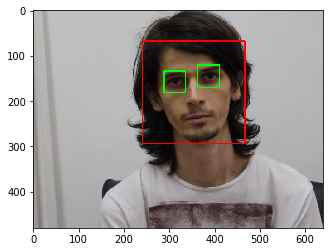

In [3]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
# plt.plot(121,53,'o')
plt.imshow(img)
# cv2.imshow('img',gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(eyes)

In [4]:
# load in data
def load_eye_cinmera():
    X = []
    y = []
    for i in range(6):
        faces_folder_path = "./data/Eye_chimeraToPublish/" + str(i)
        for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
            img = io.imread(f)
#             print(img.shape)
            if img.shape != (480, 640, 3):
                img = cv2.resize(img,(640, 480),interpolation=cv2.INTER_CUBIC)
            X.append(img)
            y.append(i)
    return X, y
X, y = load_eye_cinmera()

In [7]:
count = 0
for i in range(len(X)):
    if X[i].shape != (480, 640, 3):
#         dst = cv2.resize(X[i],(640, 480),interpolation=cv2.INTER_CUBIC)
#         X[i] = dst
        count += 1
#         print(X[i].shape)
print(count)
print(X)

0
[array([[[253, 241, 241],
        [253, 241, 241],
        [253, 241, 241],
        ..., 
        [249, 247, 250],
        [251, 249, 254],
        [253, 251, 255]],

       [[253, 241, 241],
        [253, 241, 241],
        [253, 241, 241],
        ..., 
        [249, 247, 250],
        [251, 249, 254],
        [253, 251, 255]],

       [[253, 241, 241],
        [253, 241, 241],
        [253, 241, 241],
        ..., 
        [249, 247, 250],
        [251, 249, 254],
        [253, 251, 255]],

       ..., 
       [[ 45,  24,   3],
        [ 46,  25,   4],
        [ 47,  26,   5],
        ..., 
        [112,  81,  50],
        [112,  81,  52],
        [112,  81,  52]],

       [[117,  90,  63],
        [119,  92,  65],
        [122,  95,  68],
        ..., 
        [ 98,  66,  41],
        [ 97,  65,  40],
        [ 97,  65,  40]],

       [[175, 144, 113],
        [175, 144, 113],
        [174, 143, 112],
        ..., 
        [ 76,  44,  23],
        [ 74,  42,  21],
        [ 73,  

2


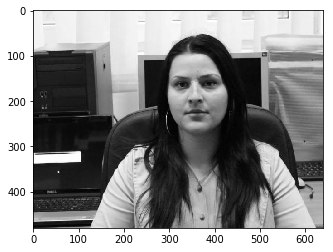

In [18]:
def detect_eyes(img):
    """Detect the left and right eyes in the image, and return two eyes image."""
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     plt.imshow(gray, cmap='gray')
    gray = gray.reshape((480,640,1))
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#     print("len of faces: ", len(faces))
    copy_img = deepcopy(img)
    eyes = []
    for (x,y,w,h) in faces:
        cv2.rectangle(copy_img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = copy_img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    if eyes is None:
        return None
    # show the facial image
#     plt.imshow(roi_color)
    return eyes
eyes_d = detect_eyes(X[7])
print(len(eyes_d))

314


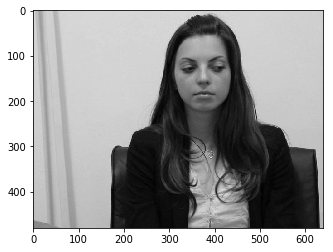

In [19]:
"""314 images have more or less than 2 eyes with viola-jones eye detector."""
count = 0
for img in X:
    eyes_d = detect_eyes(img)
    if len(eyes_d) != 2:
        count += 1
print(count)